<a href="https://colab.research.google.com/github/xhackerino/AI_Lab1/blob/main/AI_FIRST_ILYA_RAKIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`). 

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области). 

Набор переменных, которые были оценены по этим сигналам, следующий: 
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение 
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений. 
* iqr(): Интерквартильный размах 
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области 
* kurtosis(): эксцесс сигнала в частотной области 
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [ ]:
import os
import numpy as np
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными. 

In [ ]:
#первым делом делаю mount в директорию drive
#моего Google Диска, куда я предварительно закинул csv файлы
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# инициализирую датафрейм и передаю функции read_data путь к моему CSV файлу
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/drive/MyDrive/', 'train.csv')
df.head() # наш датафрейм (первые 5 строк)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [ ]:
def load_dataset(label_dict):
    train_X = read_data('/content/drive/MyDrive/', 'train.csv').values[:,:-2]
    train_y = read_data('/content/drive/MyDrive/', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('/content/drive/MyDrive/', 'test.csv').values[:,:-2]
    test_y = read_data('/content/drive/MyDrive/', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

Для работы и сравнения я выбрал четыре моделей машинного обучения из библиотеки 'sklearn':
1. Desicion Tree Classifier (Дерево решений)
2. Random Forest Classifier (Случайный лес)
3. Logistic Regression (Логистическая регрессия)
4. Linear Discriminant Analysis (Линейный дискриминантный анализ)


In [ ]:
# импортируем 4 выбранных модели из библиотеки 'sklearn' и упрощаем их инициализацию

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LRC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#инициализируем модели

model_DTC = DTC()
model_RFC = RFC()
model_LRC = LRC()
model_LDA = LDA()

**Мой выбор обоснован тем, что эти модели на приведенном наборе данных способны показать наивысшую точность и надежность работы, в отличие от принципа K-ближайших соседей и подобных ему по признакам моделям. 
Гиперпараметры моделей сохранены в значениях "по умолчанию".**

## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [ ]:
model_DTC.fit(train_X, train_y)
model_RFC.fit(train_X, train_y)
model_LRC.fit(train_X, train_y)
model_LDA.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LinearDiscriminantAnalysis()

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списках `yhat`.

In [ ]:
yhat_DTC = model_DTC.predict(test_X)
yhat_RFC = model_RFC.predict(test_X)
yhat_LRC = model_LRC.predict(test_X)
yhat_LDA = model_LDA.predict(test_X)

Выведите отчет о классификации, сравнив предсказания (`yhat`) с базовой истиной (`test_y`).

В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?

Попробуйте несколько гиперпараметров и несколько моделей. Сравните полученный результат.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print("Decision Tree Classifier: \n")
print(classification_report(test_y, yhat_DTC, target_names=target_names))
print("\n")
print("Random Forest Classifier: \n")
print(classification_report(test_y, yhat_RFC, target_names=target_names))
print("\n")
print("Logistic Regression: \n")
print(classification_report(test_y, yhat_LRC, target_names=target_names))
print("\n")
print("Linear Discriminant Analysis: \n")
print(classification_report(test_y, yhat_LDA, target_names=target_names))
print("\n")

Decision Tree Classifier: 

                    precision    recall  f1-score   support

           Walking       0.85      0.91      0.88       496
  Walking Upstairs       0.82      0.79      0.80       471
Walking Downstairs       0.87      0.83      0.85       420
           Sitting       0.83      0.76      0.79       491
          Standing       0.79      0.86      0.82       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



Random Forest Classifier: 

                    precision    recall  f1-score   support

           Walking       0.90      0.97      0.93       496
  Walking Upstairs       0.89      0.91      0.90       471
Walking Downstairs       0.96      0.85      0.90       420
           Sitting       0.91      0.90      0.91       491
          Standing       0.91      0.9

# Пояснение

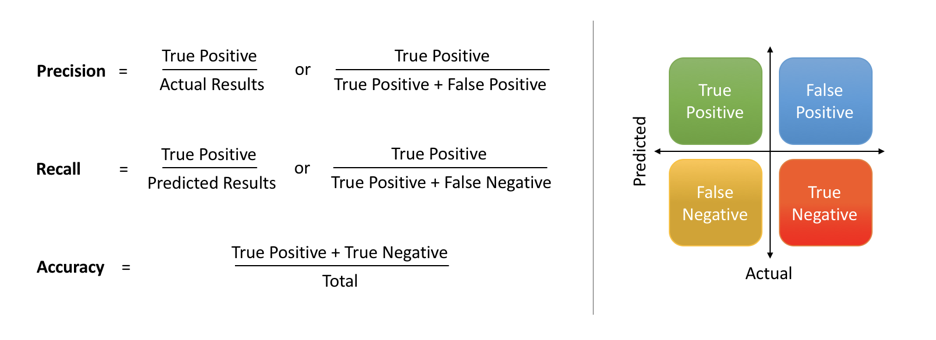

Для оценки качества работы алгоритма на каждом из классов по отдельности
используются метрики **precision** и **recall**.

Здесь: 
**True/ False** – истинная метка на объекте; 
**Positive/Negative** – ответ алгоритма на объекте;

Итого, **Precision** можно интерпретировать как долю объектов, названных
классификатором положительными и при этом действительно являющимися
положительными, а **recall** показывает, какую долю объектов положительного
класса из всех объектов положительного класса нашел алгоритм.

Интуитивно понятной, очевидной метрикой является **accuracy** — доля правильных
ответов алгоритма.


Оценка **F1** определяется как среднее гармоническое (альтернативный показатель для более распространенного среднего арифметического) между **precision** и **recall**. Другими словами, оценка **F1** — это среднее значение индивидуальных значений **precision** и **recall**. Чем выше эти значения, тем выше оценка **F1**. Показатель **F1** находится в диапазоне от 0 до 1. Чем он ближе к 1, тем лучше модель.

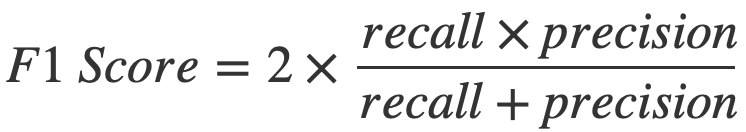

# Вывод


В процессе выполнения лабораторной работы мы обучили 4 различных моделей
классификации. К моему несчастью, худший результат показали модели "Дерева решений" и "Случайного леса", на которые я возлагал наибольшие надежды, а лучший результат разделили модели логистической регрессии и линейного дискриминантного анализа. Такая ситуация возникла из-за плохо настроенных, а в моем случае и вовсе не настроенных под конкретный (наш) случай параметров моделей Decision Tree и Random Forest.